<a href="https://colab.research.google.com/github/reggy0/customer_segmatation/blob/main/Customer_Segmentation_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

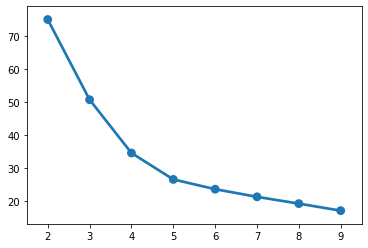

In [ ]:
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
df_model = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/df-customer-segmentation.csv')

# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes(n_clusters = k, random_state = 75)  
    kproto.fit_predict(df_model, categorical = [0,1,2])  
    cost[k]= kproto.cost_

# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

In [ ]:
import pickle  
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
  
kproto = KPrototypes ( n_clusters = 5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  
  
#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb'))  

In [ ]:
import pandas as pd
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t") 
# Menentukan segmen tiap pelanggan    
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Menggabungkan data awal dan segmen pelanggan    
df_final = df.copy()    
df_final['cluster'] = clusters
df_final.head()

segmen pelanggan: [1 2 4 4 0 3 1 4 3 3 4 4 1 1 0 3 3 4 0 2 0 4 3 0 0 4 0 3 4 4 2 1 2 0 3 0 3
 1 3 2 3 0 3 0 3 0 4 1 3 1]



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,4
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,4
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0


In [ ]:
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range (0,5):  
    print('\nPelanggan cluster: {}\n'.format(i))
    display(df_final[df_final['cluster']== i])



Pelanggan cluster: 0



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0
14,CUST-015,Shirley Ratuwati,Wanita,20,Wiraswasta,Cluster,10365668,0
18,CUST-019,Mega Pranoto,Wanita,32,Wiraswasta,Cluster,10884508,0
20,CUST-021,Lestari Fabianto,Wanita,38,Wiraswasta,Cluster,9222070,0
23,CUST-024,Putri Ginting,Wanita,39,Wiraswasta,Cluster,10259572,0
24,CUST-025,Julia Setiawan,Wanita,29,Wiraswasta,Sector,10721998,0
26,CUST-027,Grace Mulyati,Wanita,35,Wiraswasta,Cluster,9114159,0
33,CUST-034,Deasy Arisandi,Wanita,21,Wiraswasta,Sector,9759822,0
35,CUST-036,Ni Made Suasti,Wanita,30,Wiraswasta,Cluster,9678994,0
41,CUST-042,Yuliana Wati,Wanita,26,Wiraswasta,Cluster,9880607,0



Pelanggan cluster: 1



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
6,CUST-007,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,1
12,CUST-013,Cahaya Putri,Wanita,64,Wiraswasta,Cluster,9333168,1
13,CUST-014,Mario Setiawan,Pria,60,Wiraswasta,Cluster,9471615,1
31,CUST-032,Chintya Winarni,Wanita,47,Wiraswasta,Sector,10663179,1
37,CUST-038,Agatha Salim,Wanita,46,Wiraswasta,Sector,10477127,1
47,CUST-048,Maria Hutagalung,Wanita,45,Wiraswasta,Sector,10390732,1
49,CUST-050,Lianna Nugraha,Wanita,55,Wiraswasta,Sector,10569316,1



Pelanggan cluster: 2



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2
19,CUST-020,Irene Novianto,Wanita,16,Pelajar,Sector,2896845,2
30,CUST-031,Eviana Handry,Wanita,19,Mahasiswa,Cluster,3042773,2
32,CUST-033,Cecilia Kusnadi,Wanita,19,Mahasiswa,Cluster,3047926,2
39,CUST-040,Irene Darmawan,Wanita,14,Pelajar,Sector,2861855,2



Pelanggan cluster: 3



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
5,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,3
8,CUST-009,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,3
9,CUST-010,Mario Setiawan,Pria,33,Professional,Cluster,5257448,3
15,CUST-016,Bambang Rudi,Pria,35,Professional,Cluster,5262521,3
16,CUST-017,Yuni Sari,Wanita,32,Ibu Rumah Tangga,Cluster,5677762,3
22,CUST-023,Denny Amiruddin,Pria,34,Professional,Cluster,5239290,3
27,CUST-028,Adeline Huang,Wanita,40,Ibu Rumah Tangga,Cluster,6631680,3
34,CUST-035,Ida Ayu,Wanita,39,Professional,Sector,5962575,3
36,CUST-037,Felicia Tandiono,Wanita,25,Professional,Sector,5972787,3
38,CUST-039,Gina Hidayat,Wanita,20,Professional,Cluster,5257775,3



Pelanggan cluster: 4



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,4
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,4
7,CUST-008,Danang Santosa,Pria,52,Professional,Cluster,5223569,4
10,CUST-011,Maria Suryawan,Wanita,50,Professional,Sector,5987367,4
11,CUST-012,Erliana Widjaja,Wanita,49,Professional,Sector,5941914,4
17,CUST-018,Nelly Halim,Wanita,63,Ibu Rumah Tangga,Cluster,5340690,4
21,CUST-022,Novita Purba,Wanita,52,Professional,Cluster,5298157,4
25,CUST-026,Christine Winarto,Wanita,55,Professional,Cluster,5269392,4
28,CUST-029,Tia Hartanti,Wanita,56,Professional,Cluster,5271845,4
29,CUST-030,Rosita Saragih,Wanita,46,Ibu Rumah Tangga,Sector,5020976,4


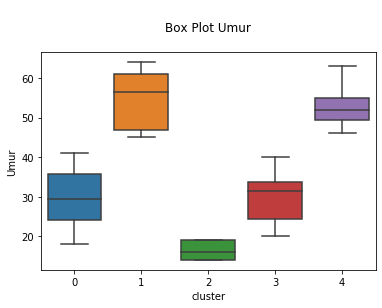

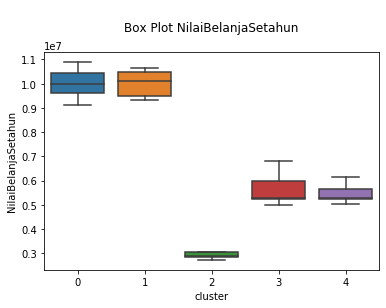

In [ ]:
import matplotlib.pyplot as plt
# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt. title('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show()

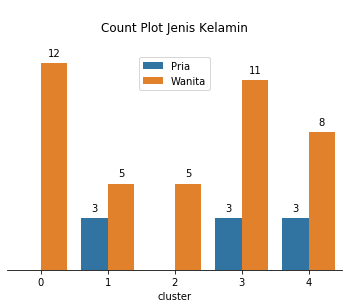

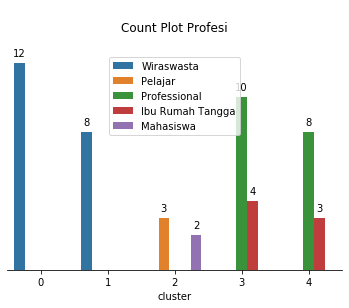

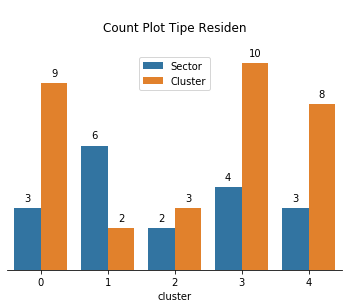

In [ ]:
import matplotlib.pyplot as plt  
# Data Kategorikal  
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax. legend (loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  


In [ ]:
# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster,segmen
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1,Diamond Senior Member
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2,Silver Member
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,4,Gold Senior Member
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,4,Gold Senior Member
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0,Diamond Young Member


In [ ]:
# Data Baru  
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]  
  
# Membuat Data Frame  
new_df = pd.DataFrame(data)  
  
# Melihat Data  
print(new_df)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  
0              8230000  


In [ ]:
def data_preprocess(data):  
    # Konversi Kategorikal data  
    kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  
      
    df_encode = data[kolom_kategorikal].copy()  
  
    ## Jenis Kelamin
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })  
      
    ## Profesi
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    })  
      
    ## Tipe Residen  
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    })  
      
    # Standardisasi Numerical Data  
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()  
      
    ## Standardisasi Kolom Umur  
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7  
      
    ## Standardisasi Kolom Nilai Belanja Setahun  
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0  
      
    # Menggabungkan Kategorikal dan numerikal data  
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
      
    return df_model  
  
# Menjalankan fungsi  
new_df_model = data_preprocess(new_df)  
  
print(new_df_model)

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


In [ ]:
def modelling (data):  
      
    # Memanggil Model  
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Melakukan Prediksi  
    clusters= kpoto.predict(data,categorical=[0,1,2])  
      
    return clusters  
  
# Menjalankan Fungsi  
clusters = modelling(new_df_model)  
  
print(clusters)  


[1]


In [ ]:
JJdef menamakan_segmen(data_asli, clusters):  
      
    # Menggabungkan cluster dan data asli  
    final_df = data_asli.copy()  
    final_df['cluster'] = clusters
      
    # Menamakan segmen  
    final_df['segmen'] = final_df['cluster'].map({  
        0: 'Diamond Young Member',  
        1: 'Diamond Senior Member',  
        2: 'Silver Students',  
        3: 'Gold Young Member',  
        4: 'Gold Senior Member'  
    })  
      
    return final_df
  
# Menjalankan Fungsi  
new_final_df = menamakan_segmen(new_df,clusters)  
  
print(new_final_df)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  cluster                 segmen  
0              8230000        1  Diamond Senior Member  
